In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine

In [3]:
# Establish connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

student_perf = pd.read_sql_query('select * from studentsperformance', con=engine)

# Disconnect
engine.dispose()

In [4]:
student_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
student_perf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
student_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


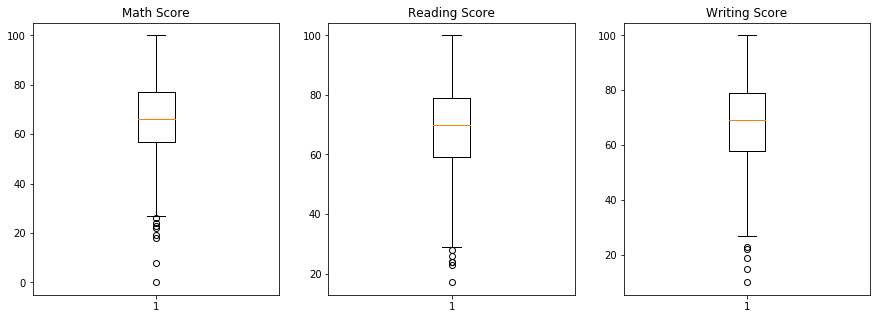

In [7]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(student_perf['math score'])
plt.title('Math Score')

plt.subplot(1, 3, 2)
plt.boxplot(student_perf['reading score'])
plt.title('Reading Score')

plt.subplot(1, 3, 3)
plt.boxplot(student_perf['writing score'])
plt.title('Writing Score')

plt.show()

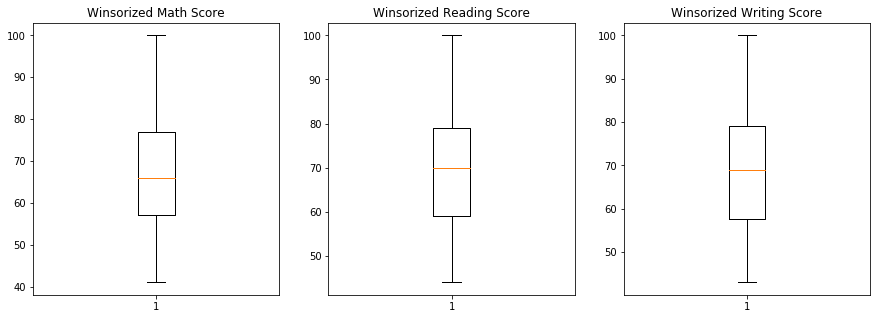

In [8]:
winsorized_math = winsorize(student_perf['math score'], (0.05, 0))
winsorized_reading = winsorize(student_perf['reading score'], (0.05, 0))
winsorized_writing = winsorize(student_perf['writing score'], (0.05, 0))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(winsorized_math)
plt.title('Winsorized Math Score')

plt.subplot(1, 3, 2)
plt.boxplot(winsorized_reading)
plt.title('Winsorized Reading Score')

plt.subplot(1, 3, 3)
plt.boxplot(winsorized_writing)
plt.title('Winsorized Writing Score')

plt.show()

### Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams? 

In [9]:
# Add winsorized variables to dataframe
student_perf['winsorize_math'] = winsorized_math
student_perf['winsorize_reading'] = winsorized_reading
student_perf['winsorize_writing'] = winsorized_writing

In [10]:
student_perf.groupby('gender').mean()

,math score,reading score,writing score,winsorize_math,winsorize_reading,winsorize_writing
gender,,,,,,
female,63.633205,72.608108,72.467181,64.301158,72.882239,72.795367
male,68.728216,65.473029,63.311203,68.879668,65.879668,63.765560


In [11]:
student_perf.groupby('race/ethnicity').mean()

,math score,reading score,writing score,winsorize_math,winsorize_reading,winsorize_writing
race/ethnicity,,,,,,
group A,61.629213,64.674157,62.674157,61.966292,65.179775,63.168539
group B,63.452632,67.352632,65.600000,64.226316,67.836842,66.326316
group C,64.463950,69.103448,67.827586,64.965517,69.454545,68.194357
group D,67.362595,70.030534,70.145038,67.572519,70.255725,70.339695
group E,73.821429,73.028571,71.407143,74.014286,73.242857,71.685714


In [12]:
student_perf.groupby('parental level of education').mean()

,math score,reading score,writing score,winsorize_math,winsorize_reading,winsorize_writing
parental level of education,,,,,,
associate's degree,67.882883,70.927928,69.896396,67.995495,71.058559,70.013514
bachelor's degree,69.389831,73.000000,73.381356,69.576271,73.059322,73.466102
high school,62.137755,64.704082,62.448980,62.841837,65.234694,63.066327
master's degree,69.745763,75.372881,75.677966,69.779661,75.406780,75.677966
some college,67.128319,69.460177,68.840708,67.469027,69.774336,69.283186
some high school,63.497207,66.938547,64.888268,64.363128,67.636872,65.625698


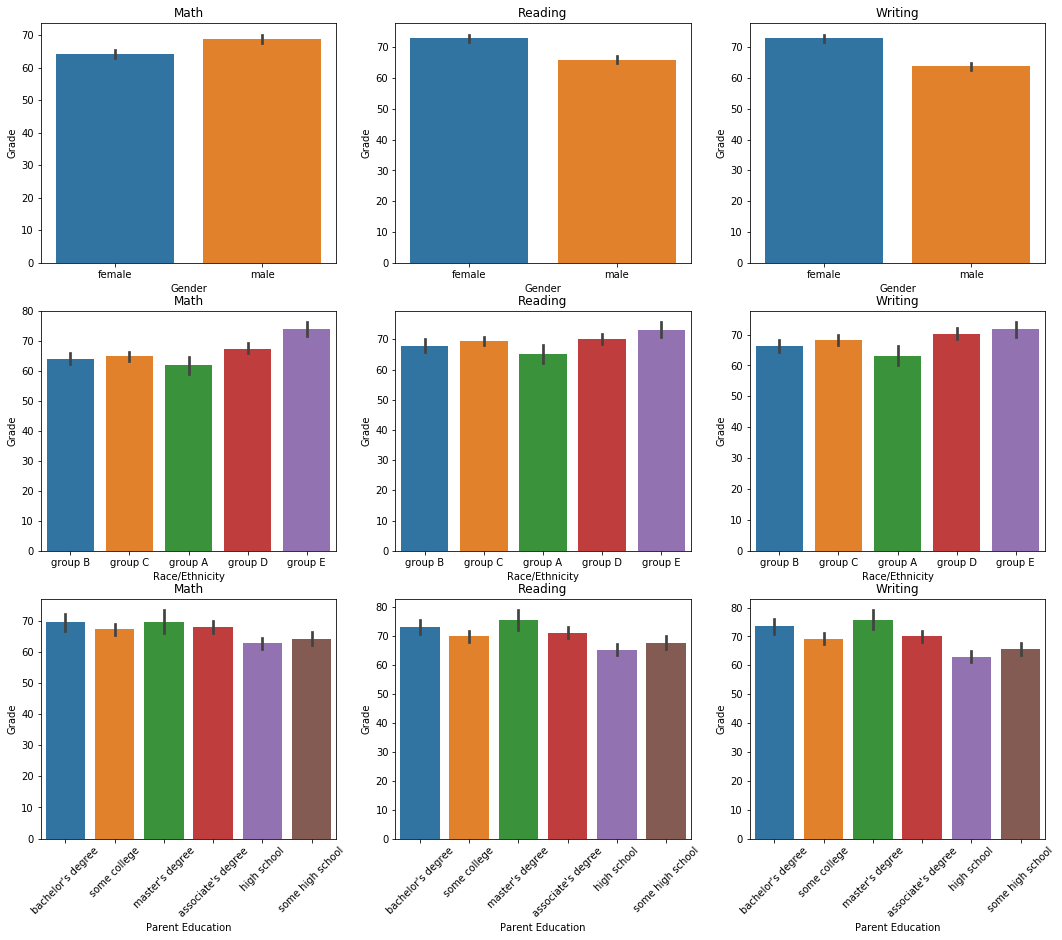

In [13]:
plt.figure(figsize=(18, 15))

plt.subplot(3, 3, 1)
sns.barplot(student_perf['gender'], winsorized_math)
plt.title('Math')
plt.ylabel('Grade')
plt.xlabel('Gender')

plt.subplot(3, 3, 2)
sns.barplot(student_perf['gender'], winsorized_reading)
plt.title('Reading')
plt.ylabel('Grade')
plt.xlabel('Gender')

plt.subplot(3, 3, 3)
sns.barplot(student_perf['gender'], winsorized_writing)
plt.title('Writing')
plt.ylabel('Grade')
plt.xlabel('Gender')

plt.subplot(3, 3, 4)
sns.barplot(student_perf['race/ethnicity'], winsorized_math)
plt.title('Math')
plt.ylabel('Grade')
plt.xlabel('Race/Ethnicity')

plt.subplot(3, 3, 5)
sns.barplot(student_perf['race/ethnicity'], winsorized_reading)
plt.title('Reading')
plt.ylabel('Grade')
plt.xlabel('Race/Ethnicity')

plt.subplot(3, 3, 6)
sns.barplot(student_perf['race/ethnicity'], winsorized_writing)
plt.title('Writing')
plt.ylabel('Grade')
plt.xlabel('Race/Ethnicity')

plt.subplot(3, 3, 7)
sns.barplot(student_perf['parental level of education'], winsorized_math)
plt.title('Math')
plt.ylabel('Grade')
plt.xlabel('Parent Education')
plt.xticks(rotation=45)

plt.subplot(3, 3, 8)
sns.barplot(student_perf['parental level of education'], winsorized_reading)
plt.title('Reading')
plt.ylabel('Grade')
plt.xlabel('Parent Education')
plt.xticks(rotation=45)

plt.subplot(3, 3, 9)
sns.barplot(student_perf['parental level of education'], winsorized_writing)
plt.title('Writing')
plt.ylabel('Grade')
plt.xlabel('Parent Education')
plt.xticks(rotation=45)

plt.show()

In [14]:
# Retrive unique values
gender = student_perf['gender'].unique()
ethnicity = student_perf['race/ethnicity'].unique()
education = student_perf['parental level of education'].unique()

# Winsorized list
winsorized_list = ['winsorize_math', 'winsorize_reading', 'winsorize_writing']

In [15]:
for var in winsorized_list:
    print('---------------------------')
    print('Comparisons for variable {}'.format(var))
    print('---------------------------')
    for i in range(0, len(gender)):
        for j in range(i + 1, len(gender)):
            print('t-test between groups {} and {}'.format(gender[i], gender[j]))
            print(stats.ttest_ind(student_perf[student_perf['gender'] == gender[i]][var], 
                                  student_perf[student_perf['gender'] == gender[j]][var]))

---------------------------
Comparisons for variable winsorize_math
---------------------------
t-test between groups female and male
Ttest_indResult(statistic=-5.158614875216476, pvalue=3.0002085711706424e-07)
---------------------------
Comparisons for variable winsorize_reading
---------------------------
t-test between groups female and male
Ttest_indResult(statistic=8.256852698185739, pvalue=4.707834304776066e-16)
---------------------------
Comparisons for variable winsorize_writing
---------------------------
t-test between groups female and male
Ttest_indResult(statistic=10.480804016258956, pvalue=1.866073394544097e-24)


In [16]:
for var in winsorized_list:
    print('---------------------------')
    print('Comparisons for variable {}'.format(var))
    print('---------------------------')
    for i in range(0, len(ethnicity)):
        for j in range(i + 1, len(ethnicity)):
            print('t-test between groups {} and {}'.format(ethnicity[i], ethnicity[j]))
            print(stats.ttest_ind(student_perf[student_perf['race/ethnicity'] == ethnicity[i]][var], 
                                  student_perf[student_perf['race/ethnicity'] == ethnicity[j]][var]))

---------------------------
Comparisons for variable winsorize_math
---------------------------
t-test between groups group B and group C
Ttest_indResult(statistic=-0.5886934364500052, pvalue=0.5563291145800503)
t-test between groups group B and group A
Ttest_indResult(statistic=1.276793762433331, pvalue=0.20274436852517402)
t-test between groups group B and group D
Ttest_indResult(statistic=-2.6094258260179517, pvalue=0.009371584264687637)
t-test between groups group B and group E
Ttest_indResult(statistic=-6.145147043500085, pvalue=2.3150204115616596e-09)
t-test between groups group C and group A
Ttest_indResult(statistic=1.8200810486560217, pvalue=0.06948283563090431)
t-test between groups group C and group D
Ttest_indResult(statistic=-2.3151785619879734, pvalue=0.020951864620859913)
t-test between groups group C and group E
Ttest_indResult(statistic=-6.318737846083957, pvalue=6.268100112554187e-10)
t-test between groups group A and group D
Ttest_indResult(statistic=-3.4003136540445

In [17]:
for var in winsorized_list:
    print('---------------------------')
    print('Comparisons for variable {}'.format(var))
    print('---------------------------')
    for i in range(0, len(gender)):
        for j in range(i + 1, len(education)):
            print('t-test between groups {} and {}'.format(education[i], education[j]))
            print(stats.ttest_ind(student_perf[student_perf['parental level of education'] == education[i]][var], 
                                  student_perf[student_perf['parental level of education'] == education[j]][var]))

---------------------------
Comparisons for variable winsorize_math
---------------------------
t-test between groups bachelor's degree and some college
Ttest_indResult(statistic=1.3399679531001838, pvalue=0.18114536159781017)
t-test between groups bachelor's degree and master's degree
Ttest_indResult(statistic=-0.08668151845522913, pvalue=0.9310237672855833)
t-test between groups bachelor's degree and associate's degree
Ttest_indResult(statistic=0.9404957054963871, pvalue=0.3476350002498524)
t-test between groups bachelor's degree and high school
Ttest_indResult(statistic=4.24583109782114, pvalue=2.8767281878660252e-05)
t-test between groups bachelor's degree and some high school
Ttest_indResult(statistic=3.0943223823304735, pvalue=0.0021618060588927475)
t-test between groups some college and master's degree
Ttest_indResult(statistic=-1.1433476391729471, pvalue=0.25386053547708326)
t-test between groups some college and associate's degree
Ttest_indResult(statistic=-0.39275019166584835

### Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this? 

In [18]:
student_perf.groupby('lunch').mean()

,math score,reading score,writing score,winsorize_math,winsorize_reading,winsorize_writing
lunch,,,,,,
free/reduced,58.921127,64.653521,63.022535,59.909859,65.346479,63.833803
standard,70.034109,71.654264,70.823256,70.139535,71.796899,70.979845


In [19]:
# Retrieve unique values
lunch = student_perf['lunch'].unique()

for var in winsorized_list:
    print('---------------------------')
    print('Comparisons for variable {}'.format(var))
    print('---------------------------')
    for i in range(0, len(lunch)):
        for j in range(i + 1, len(lunch)):
            print('t-test between groups {} and {}'.format(lunch[i], lunch[j]))
            print(stats.ttest_ind(student_perf[student_perf['lunch'] == lunch[i]][var], 
                                  student_perf[student_perf['lunch'] == lunch[j]][var]))

---------------------------
Comparisons for variable winsorize_math
---------------------------
t-test between groups standard and free/reduced
Ttest_indResult(statistic=11.60513956758396, pvalue=2.6808982228731156e-29)
---------------------------
Comparisons for variable winsorize_reading
---------------------------
t-test between groups standard and free/reduced
Ttest_indResult(statistic=7.229107552822186, pvalue=9.65880540245068e-13)
---------------------------
Comparisons for variable winsorize_writing
---------------------------
t-test between groups standard and free/reduced
Ttest_indResult(statistic=7.763281955135954, pvalue=2.043591547232422e-14)


### Does the test preparation course seem to have an effect on the exam performances? 

In [20]:
student_perf.groupby('test preparation course').mean()

,math score,reading score,writing score,winsorize_math,winsorize_reading,winsorize_writing
test preparation course,,,,,,
completed,69.695531,73.893855,74.418994,69.854749,73.955307,74.472067
none,64.077882,66.534268,64.504673,64.641745,67.026480,65.080997


In [21]:
# Retrieve unique values
test_course = student_perf['test preparation course'].unique()

for var in winsorized_list:
    print('---------------------------')
    print('Comparisons for variable {}'.format(var))
    print('---------------------------')
    for i in range(0, len(test_course)):
        for j in range(i + 1, len(test_course)):
            print('t-test between groups {} and {}'.format(test_course[i], test_course[j]))
            print(stats.ttest_ind(student_perf[student_perf['test preparation course'] == test_course[i]][var], 
                                  student_perf[student_perf['test preparation course'] == test_course[j]][var]))

---------------------------
Comparisons for variable winsorize_math
---------------------------
t-test between groups none and completed
Ttest_indResult(statistic=-5.6498913465919225, pvalue=2.0936519058914e-08)
---------------------------
Comparisons for variable winsorize_reading
---------------------------
t-test between groups none and completed
Ttest_indResult(statistic=-7.812273971873327, pvalue=1.4180597480852587e-14)
---------------------------
Comparisons for variable winsorize_writing
---------------------------
t-test between groups none and completed
Ttest_indResult(statistic=-10.455585268650667, pvalue=2.372253916694949e-24)


### Which 2 exam scores are most correlated with each other? 

In [22]:
student_perf.corr()

,math score,reading score,writing score,winsorize_math,winsorize_reading,winsorize_writing
math score,1.000000,0.817580,0.802642,0.986352,0.805170,0.785750
reading score,0.817580,1.000000,0.954598,0.805113,0.990906,0.943019
writing score,0.802642,0.954598,1.000000,0.787526,0.944483,0.988909
winsorize_math,0.986352,0.805113,0.787526,1.000000,0.808652,0.788778
winsorize_reading,0.805170,0.990906,0.944483,0.808652,1.000000,0.951425
winsorize_writing,0.785750,0.943019,0.988909,0.788778,0.951425,1.000000


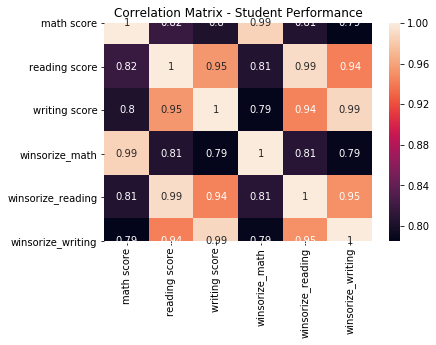

In [76]:
sns.heatmap(student_perf.corr(), annot=True)
plt.title('Correlation Matrix - Student Performance')
plt.show()

The two exam scores most correlated to each other are reading and writing.